第 7 章实例：预测泰坦尼克号幸存者

In [1]:
def read_data_set(fname):
    data = pd.read_csv(fname,index_col=0)
    # 丢弃没有用的数据
    data.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)
    # 处理性别数据
    data['Sex'] = (data['Sex']=='male').astype('int')
    labels =data['Embarked'].unique().tolist()
    data['Embarked']=data['Embarked'].apply(lambda n : labels.index(n))
    data = data.fillna(0)
    return data

In [2]:
data = pd.read_csv('./datasets/titanic/train.csv')
(data['Sex']=='male').astype('int')
data['Embarked'].unique().tolist()

['S', 'C', 'Q', nan]

In [3]:
train = read_data_set('./datasets/titanic/train.csv')

In [4]:
from sklearn.model_selection import train_test_split

y = train['Survived'].values
train.drop(['Survived'],axis=1,inplace=True)
X = train.values

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=666)

In [6]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
score = clf.score(X_test,y_test)

In [7]:
score

0.7821229050279329

In [8]:
def cv_score(d):
    clf = DecisionTreeClassifier(max_depth=d)
    clf.fit(X_train,y_train)
    train_score = clf.score(X_train,y_train)
    cv_score = clf.score(X_test,y_test)
    return (train_score,cv_score)

In [9]:
depths = range(2,15) # [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [10]:
list(depths)

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [11]:
scores = [cv_score(d) for d in depths]

In [12]:
scores

[(0.7879213483146067, 0.7821229050279329),
 (0.8146067415730337, 0.7877094972067039),
 (0.8230337078651685, 0.7877094972067039),
 (0.8525280898876404, 0.7877094972067039),
 (0.8735955056179775, 0.7877094972067039),
 (0.8974719101123596, 0.8044692737430168),
 (0.9073033707865169, 0.7988826815642458),
 (0.9199438202247191, 0.7877094972067039),
 (0.9410112359550562, 0.776536312849162),
 (0.9578651685393258, 0.8100558659217877),
 (0.9634831460674157, 0.7877094972067039),
 (0.9705056179775281, 0.7988826815642458),
 (0.9775280898876404, 0.7821229050279329)]

In [13]:
train_scores =[s[0] for s in scores]
cv_scores = [s[1] for s in scores]

In [14]:
best_score_index = np.argmax(cv_scores)
best_score_index

9

In [15]:
best_score = cv_scores[best_score_index]

In [16]:
best_score

0.8100558659217877

In [17]:
best_param = depths[best_score_index]

In [18]:
best_param

11

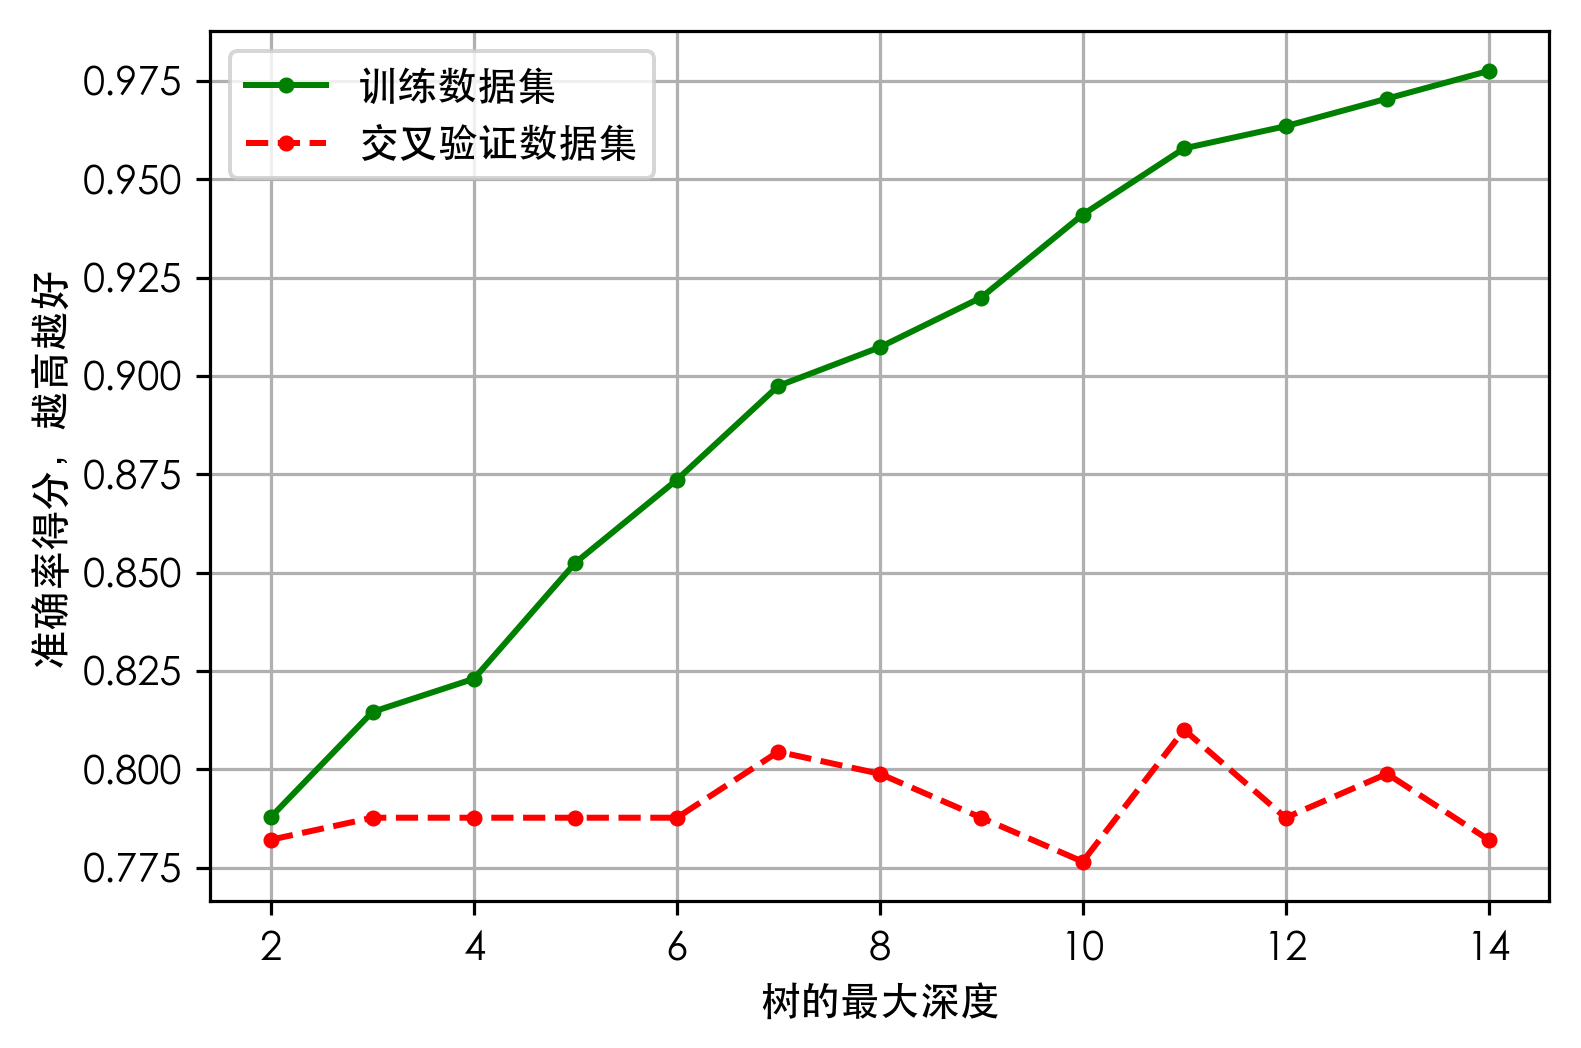

In [22]:
plt.figure(figsize=(6,4),dpi=144)
plt.grid()
plt.xlabel('树的最大深度')
plt.ylabel('准确率得分，越高越好')
plt.plot(depths,train_scores,'.g-',label='训练数据集')
plt.plot(depths,cv_scores,'.r--',label='交叉验证数据集')
plt.legend()
plt.show()

找 min_impurity_split（信息熵或基尼不纯度的阈值）。

In [27]:
def cv_score_min_impurity_split(value):
    clf = DecisionTreeClassifier(criterion='gini',min_impurity_decrease=value)
    clf.fit(X_train,y_train)
    train_score = clf.score(X_train,y_train)
    cv_score = clf.score(X_test,y_test)
    return (train_score,cv_score)

In [28]:
values = np.linspace(0,0.5,50)
scores = [cv_score_min_impurity_split(val) for val in values]

In [29]:
train_scores = [s[0] for s in scores]
cv_scores = [s[1] for s in scores]

In [32]:
best_param_index = np.argmax(cv_scores)

In [34]:
values[best_param_index]

0.04081632653061224

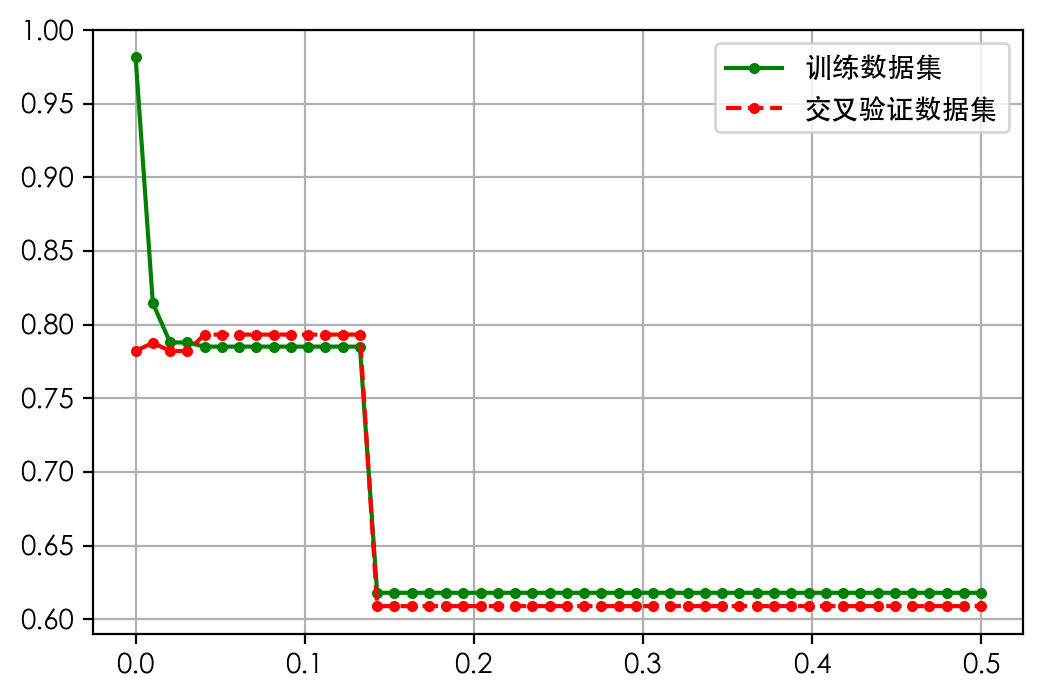

In [46]:
plt.figure(figsize=(6,4),dpi=100)
plt.grid()
plt.plot(values,train_scores,'.g-',label='训练数据集')
plt.plot(values,cv_scores,'.r--',label='交叉验证数据集')
plt.legend()
plt.show()

In [47]:
from sklearn.model_selection import GridSearchCV

thresholds = np.linspace(0,0.5,50)

In [77]:
param_grid = {'min_impurity_split':thresholds}

In [78]:
clf = GridSearchCV(DecisionTreeClassifier(),param_grid=param_grid,cv=5)

In [79]:
clf.fit(X_train,y_train)

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in v

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in v

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in v

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_impurity_split': array([0.     , 0.0102 , 0.02041, 0.03061, 0.04082, 0.05102, 0.06122,
       0.07143, 0.08163, 0.09184, 0.10204, 0.11224, 0.12245, 0.13265,
       0.14286, 0.15306, 0.16327, 0.17347, 0.18367, 0.19388, 0.20408,
       0.21429, 0.22449, 0.23469, 0.2449 , 0.2551 , 0.26...16, 0.41837,
       0.42857, 0.43878, 0.44898, 0.45918, 0.46939, 0.47959, 0.4898 ,
       0.5    ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [80]:
clf.best_params_

{'min_impurity_split': 0.22448979591836732}

In [81]:
clf.best_score_

0.8132022471910112

In [83]:
entropy_thresholds = np.linspace(0,1,50)
gini_thresholds = np.linspace(0,0.5,50)

In [89]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'criterion':['entropy'],'min_impurity_split':entropy_thresholds},
    {'criterion':['gini'],'min_impurity_split':gini_thresholds},
    {'max_depth':range(2,10)},
    {'min_impurity_split':range(2,30,2)}
]
clf = GridSearchCV(DecisionTreeClassifier(),param_grid=param_grid,cv=5,n_jobs=-1,verbose=2)
clf.fit(X_train,y_train)

Fitting 5 folds for each of 122 candidates, totalling 610 fits
[CV] criterion=entropy, min_impurity_split=0.0 .......................
[CV] criterion=entropy, min_impurity_split=0.0 .......................
[CV] criterion=entropy, min_impurity_split=0.0 .......................


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=entropy, min_impurity_split=0.0 .......................
[CV] criterion=entropy, min_impurity_split=0.0 .......................
[CV] criterion=entropy, min_impurity_split=0.02040816326530612 .......


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=entropy, min_impurity_split=0.02040816326530612 .......


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] ........ criterion=entropy, min_impurity_split=0.0, total=   0.0s
[CV] criterion=entropy, min_impurity_split=0.02040816326530612 .......


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] ........ criterion=entropy, min_impurity_split=0.0, total=   0.0s
[CV] ........ criterion=entropy, min_impurity_split=0.0, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=entropy, min_impurity_split=0.02040816326530612 .......
[CV] ........ criterion=entropy, min_impurity_split=0.0, total=   0.0s
[CV] criterion=entropy, min_impurity_split=0.02040816326530612 .......
[CV]  criterion=entropy, min_impurity_split=0.02040816326530612, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] ........ criterion=entropy, min_impurity_split=0.0, total=   0.0s
[CV] criterion=entropy, min_impurity_split=0.04081632653061224 .......
[CV] criterion=entropy, min_impurity_split=0.04081632653061224 .......
[CV]  criterion=entropy, min_impurity_split=0.02040816326530612, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=entropy, min_impurity_split=0.04081632653061224 .......
[CV] criterion=entropy, min_impurity_split=0.04081632653061224 .......
[CV]  criterion=entropy, min_impurity_split=0.02040816326530612, total=   0.0s
[CV] criterion=entropy, min_impurity_split=0.04081632653061224 .......


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=entropy, min_impurity_split=0.02040816326530612, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=entropy, min_impurity_split=0.02040816326530612, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=entropy, min_impurity_split=0.061224489795918366 ......


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=entropy, min_impurity_split=0.04081632653061224, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=entropy, min_impurity_split=0.04081632653061224, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.04081632653061224, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.04081632653061224, total=   0.0s
[CV] criterion=entropy, min_impurity_split=0.061224489795918366 ......
[CV]  criterion=entropy, min_impurity_split=0.04081632653061224, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.061224489795918366, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=entropy, min_impurity_split=0.1020408163265306 ........
[CV]  criterion=entropy, min_impurity_split=0.061224489795918366, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=entropy, min_impurity_split=0.061224489795918366 ......
[CV]  criterion=entropy, min_impurity_split=0.1020408163265306, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=entropy, min_impurity_split=0.1020408163265306 ........
[CV]  criterion=entropy, min_impurity_split=0.061224489795918366, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=entropy, min_impurity_split=0.061224489795918366 ......


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=entropy, min_impurity_split=0.1020408163265306, total=   0.0s
[CV] criterion=entropy, min_impurity_split=0.12244897959183673 .......
[CV]  criterion=entropy, min_impurity_split=0.061224489795918366, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=entropy, min_impurity_split=0.061224489795918366 ......


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=entropy, min_impurity_split=0.16326530612244897 .......
[CV]  criterion=entropy, min_impurity_split=0.12244897959183673, total=   0.0s
[CV] criterion=entropy, min_impurity_split=0.12244897959183673 .......


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=entropy, min_impurity_split=0.061224489795918366, total=   0.0s
[CV] criterion=entropy, min_impurity_split=0.08163265306122448 .......
[CV]  criterion=entropy, min_impurity_split=0.16326530612244897, total=   0.0s
[CV] criterion=entropy, min_impurity_split=0.16326530612244897 .......
[CV]  criterion=entropy, min_impurity_split=0.12244897959183673, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=entropy, min_impurity_split=0.12244897959183673 .......


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=entropy, min_impurity_split=0.08163265306122448, total=   0.0s
[CV] criterion=entropy, min_impurity_split=0.2040816326530612 ........
[CV] criterion=entropy, min_impurity_split=0.08163265306122448 .......
[CV]  criterion=entropy, min_impurity_split=0.16326530612244897, total=   0.0s
[CV] criterion=entropy, min_impurity_split=0.16326530612244897 .......


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=entropy, min_impurity_split=0.12244897959183673, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=entropy, min_impurity_split=0.3061224489795918 ........
[CV] criterion=entropy, min_impurity_split=0.12244897959183673 .......
[CV] criterion=entropy, min_impurity_split=0.24489795918367346 .......
[CV]  criterion=entropy, min_impurity_split=0.2040816326530612, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.08163265306122448, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=entropy, min_impurity_split=0.16326530612244897, total=   0.0s
[CV] criterion=entropy, min_impurity_split=0.2040816326530612 ........
[CV] criterion=entropy, min_impurity_split=0.08163265306122448 .......


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=entropy, min_impurity_split=0.3469387755102041 ........
[CV]  criterion=entropy, min_impurity_split=0.12244897959183673, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.3061224489795918, total=   0.0s
[CV] criterion=entropy, min_impurity_split=0.16326530612244897 .......


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=entropy, min_impurity_split=0.4081632653061224 ........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=entropy, min_impurity_split=0.3061224489795918 ........
[CV] criterion=entropy, min_impurity_split=0.12244897959183673 .......


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=entropy, min_impurity_split=0.24489795918367346, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.2040816326530612, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.08163265306122448, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=entropy, min_impurity_split=0.3469387755102041, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=entropy, min_impurity_split=0.16326530612244897, total=   0.0s
[CV] criterion=entropy, min_impurity_split=0.26530612244897955 .......


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=entropy, min_impurity_split=0.2040816326530612 ........
[CV] criterion=entropy, min_impurity_split=0.16326530612244897 .......
[CV]  criterion=entropy, min_impurity_split=0.4081632653061224, total=   0.0s
[CV] criterion=entropy, min_impurity_split=0.08163265306122448 .......
[CV] criterion=entropy, min_impurity_split=0.3469387755102041 ........
[CV]  criterion=entropy, min_impurity_split=0.12244897959183673, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.3061224489795918, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=entropy, min_impurity_split=0.4081632653061224 ........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=entropy, min_impurity_split=0.26530612244897955, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=entropy, min_impurity_split=0.14285714285714285 .......
[CV]  criterion=entropy, min_impurity_split=0.08163265306122448, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.16326530612244897, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.2040816326530612, total=   0.0s
[CV] criterion=entropy, min_impurity_split=0.08163265306122448 .......
[CV] criterion=entropy, min_impurity_split=0.3061224489795918 ........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=entropy, min_impurity_split=0.26530612244897955 .......
[CV]  criterion=entropy, min_impurity_split=0.3469387755102041, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=entropy, min_impurity_split=0.22448979591836732 .......
[CV] criterion=entropy, min_impurity_split=0.18367346938775508 .......


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=entropy, min_impurity_split=0.36734693877551017 .......


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=entropy, min_impurity_split=0.4081632653061224, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=entropy, min_impurity_split=0.14285714285714285, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.3061224489795918, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=entropy, min_impurity_split=0.4081632653061224 ........
[CV]  criterion=entropy, min_impurity_split=0.08163265306122448, total=   0.0s
[CV] criterion=entropy, min_impurity_split=0.14285714285714285 .......
[CV]  criterion=entropy, min_impurity_split=0.26530612244897955, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.18367346938775508, total=   0.0s
[CV] criterion=entropy, min_impurity_split=0.1020408163265306 ........
[CV] criterion=entropy, min_impurity_split=0.3061224489795918 ........
[CV]  criterion=entropy, min_impurity_split=0.22448979591836732, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=entropy, min_impurity_split=0.26530612244897955 .......
[CV] criterion=entropy, min_impurity_split=0.18367346938775508 .......


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=entropy, min_impurity_split=0.36734693877551017, total=   0.0s
[CV] criterion=entropy, min_impurity_split=0.22448979591836732 .......


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=entropy, min_impurity_split=0.36734693877551017 .......


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=entropy, min_impurity_split=0.4081632653061224, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=entropy, min_impurity_split=0.14285714285714285, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=entropy, min_impurity_split=0.1020408163265306, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.3061224489795918, total=   0.0s
[CV] criterion=entropy, min_impurity_split=0.4081632653061224 ........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=entropy, min_impurity_split=0.26530612244897955, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.18367346938775508, total=   0.0s
[CV] criterion=entropy, min_impurity_split=0.14285714285714285 .......
[CV] criterion=entropy, min_impurity_split=0.32653061224489793 .......
[CV] criterion=entropy, min_impurity_split=0.1020408163265306 ........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=entropy, min_impurity_split=0.26530612244897955 .......
[CV]  criterion=entropy, min_impurity_split=0.22448979591836732, total=   0.0s
[CV] criterion=entropy, min_impurity_split=0.18367346938775508 .......


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=entropy, min_impurity_split=0.36734693877551017, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=entropy, min_impurity_split=0.22448979591836732 .......


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=entropy, min_impurity_split=0.36734693877551017 .......


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=entropy, min_impurity_split=0.4081632653061224, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=entropy, min_impurity_split=0.14285714285714285, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.1020408163265306, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.18367346938775508, total=   0.0s
[CV] criterion=entropy, min_impurity_split=0.14285714285714285 .......
[CV]  criterion=entropy, min_impurity_split=0.32653061224489793, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=entropy, min_impurity_split=0.1020408163265306 ........
[CV]  criterion=entropy, min_impurity_split=0.26530612244897955, total=   0.0s
[CV] criterion=entropy, min_impurity_split=0.4081632653061224 ........
[CV] criterion=entropy, min_impurity_split=0.18367346938775508 .......
[CV] criterion=entropy, min_impurity_split=0.32653061224489793 .......
[CV]  criterion=entropy, min_impurity_split=0.22448979591836732, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.36734693877551017, total=   0.0s
[CV] criterion=entropy, min_impurity_split=0.26530612244897955 .......


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=entropy, min_impurity_split=0.36734693877551017 .......


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=entropy, min_impurity_split=0.22448979591836732 .......


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=entropy, min_impurity_split=0.4081632653061224, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.1020408163265306, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.14285714285714285, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.18367346938775508, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=entropy, min_impurity_split=0.32653061224489793, total=   0.0s
[CV] criterion=entropy, min_impurity_split=0.42857142857142855 .......


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=entropy, min_impurity_split=0.44897959183673464 .......
[CV]  criterion=entropy, min_impurity_split=0.26530612244897955, total=   0.0s
[CV] criterion=entropy, min_impurity_split=0.18367346938775508 .......
[CV] criterion=entropy, min_impurity_split=0.32653061224489793 .......


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=entropy, min_impurity_split=0.14285714285714285 .......
[CV] criterion=entropy, min_impurity_split=0.2857142857142857 ........
[CV]  criterion=entropy, min_impurity_split=0.36734693877551017, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=entropy, min_impurity_split=0.22448979591836732, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=entropy, min_impurity_split=0.42857142857142855, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=entropy, min_impurity_split=0.36734693877551017 .......


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=entropy, min_impurity_split=0.18367346938775508, total=   0.0s
[CV] criterion=entropy, min_impurity_split=0.22448979591836732 .......


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=entropy, min_impurity_split=0.42857142857142855 .......
[CV]  criterion=entropy, min_impurity_split=0.32653061224489793, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.44897959183673464, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.14285714285714285, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=entropy, min_impurity_split=0.2040816326530612 ........
[CV] criterion=entropy, min_impurity_split=0.32653061224489793 .......
[CV] criterion=entropy, min_impurity_split=0.44897959183673464 .......


[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    0.5s


[CV]  criterion=entropy, min_impurity_split=0.36734693877551017, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.2857142857142857, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=entropy, min_impurity_split=0.3877551020408163 ........
[CV] criterion=entropy, min_impurity_split=0.4897959183673469 ........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=entropy, min_impurity_split=0.22448979591836732, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=entropy, min_impurity_split=0.2857142857142857 ........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=entropy, min_impurity_split=0.24489795918367346 .......


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=entropy, min_impurity_split=0.42857142857142855, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.2040816326530612, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=entropy, min_impurity_split=0.32653061224489793, total=   0.0s
[CV] criterion=entropy, min_impurity_split=0.42857142857142855 .......


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=entropy, min_impurity_split=0.2040816326530612 ........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=entropy, min_impurity_split=0.4897959183673469, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.44897959183673464, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.3877551020408163, total=   0.0s
[CV] criterion=entropy, min_impurity_split=0.32653061224489793 .......
[CV] criterion=entropy, min_impurity_split=0.5102040816326531 ........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=entropy, min_impurity_split=0.44897959183673464 .......
[CV]  criterion=entropy, min_impurity_split=0.24489795918367346, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.42857142857142855, total=   0.0s
[CV] criterion=entropy, min_impurity_split=0.3877551020408163 ........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=entropy, min_impurity_split=0.2857142857142857, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=entropy, min_impurity_split=0.2040816326530612, total=   0.0s
[CV] criterion=entropy, min_impurity_split=0.24489795918367346 .......
[CV] criterion=entropy, min_impurity_split=0.42857142857142855 .......
[CV] criterion=entropy, min_impurity_split=0.2857142857142857 ........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=entropy, min_impurity_split=0.44897959183673464, total=   0.0s
[CV] criterion=entropy, min_impurity_split=0.5510204081632653 ........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=entropy, min_impurity_split=0.32653061224489793, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.5102040816326531, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=entropy, min_impurity_split=0.3877551020408163, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.42857142857142855, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.24489795918367346, total=   0.0s
[CV] criterion=entropy, min_impurity_split=0.4693877551020408 ........
[CV] criterion=entropy, min_impurity_split=0.3877551020408163 ........
[CV] criterion=entropy, min_impurity_split=0.3469387755102041 ........
[CV] criterion=entropy, min_impurity_split=0.5102040816326531 ........
[CV]  criterion=entropy, min_impurity_split=0.2857142857142857, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.5510204081632653, total=   0.0s
[CV] criterion=entropy, min_impurity_split=0.24489795918367346 .......


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=entropy, min_impurity_split=0.42857142857142855 .......
[CV] criterion=entropy, min_impurity_split=0.2857142857142857 ........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=entropy, min_impurity_split=0.5510204081632653 ........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in v

[CV]  criterion=entropy, min_impurity_split=0.3877551020408163, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.3469387755102041, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.24489795918367346, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.4693877551020408, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.5102040816326531, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.42857142857142855, total=   0.0s
[CV] criterion=entropy, min_impurity_split=0.3877551020408163 ........
[CV]  criterion=entropy, min_impurity_split=0.5510204081632653, total=   0.0s
[CV] criterion=entropy, min_impurity_split=0.24489795918367346 .......
[CV] criterion=entropy, min_impurity_split=0.3469387755102041 ........
[CV] criterion=entropy, min_impurity_split=0.5510204081632653 ........
[CV] criterion=entropy, min_impurity_split=0.44897959183673464 .......
[CV] criterion=entropy, min_impurity_split=0.5102040816326531 ........
[CV] criterion=entropy, mi

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=entropy, min_impurity_split=0.2857142857142857 ........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in v

[CV]  criterion=entropy, min_impurity_split=0.44897959183673464, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.3877551020408163, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=entropy, min_impurity_split=0.24489795918367346, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.3469387755102041, total=   0.0s
[CV] criterion=entropy, min_impurity_split=0.3469387755102041 ........
[CV] criterion=entropy, min_impurity_split=0.3877551020408163 ........
[CV] criterion=entropy, min_impurity_split=0.44897959183673464 .......
[CV]  criterion=entropy, min_impurity_split=0.5510204081632653, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.5102040816326531, total=   0.0s
[CV] criterion=entropy, min_impurity_split=0.5918367346938775 ........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=entropy, min_impurity_split=0.2857142857142857, total=   0.0s
[CV] criterion=entropy, min_impurity_split=0.5510204081632653 ........
[CV] criterion=entropy, min_impurity_split=0.5102040816326531 ........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=entropy, min_impurity_split=0.4693877551020408, total=   0.0s
[CV] criterion=entropy, min_impurity_split=0.3061224489795918 ........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=entropy, min_impurity_split=0.4693877551020408 ........
[CV]  criterion=entropy, min_impurity_split=0.3469387755102041, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=entropy, min_impurity_split=0.3877551020408163, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.44897959183673464, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=entropy, min_impurity_split=0.5510204081632653, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.5102040816326531, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.5918367346938775, total=   0.0s
[CV] criterion=entropy, min_impurity_split=0.6530612244897959 ........
[CV] criterion=entropy, min_impurity_split=0.5714285714285714 ........
[CV] criterion=entropy, min_impurity_split=0.5102040816326531 ........
[CV] criterion=entropy, min_impurity_split=0.5918367346938775 ........
[CV] criterion=entropy, min_impurity_split=0.6938775510204082 ........
[CV]  criterion=entropy, min_impurity_split=0.3061224489795918, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=entropy, min_impurity_split=0.7346938775510203 ........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=entropy, min_impurity_split=0.7959183673469387 ........
[CV]  criterion=entropy, min_impurity_split=0.4693877551020408, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.6530612244897959, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=entropy, min_impurity_split=0.5918367346938775, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=entropy, min_impurity_split=0.5714285714285714, total=   0.0s
[CV] criterion=entropy, min_impurity_split=0.4693877551020408 ........
[CV]  criterion=entropy, min_impurity_split=0.6938775510204082, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.5102040816326531, total=   0.0s
[CV] criterion=entropy, min_impurity_split=0.6122448979591836 ........
[CV] criterion=entropy, min_impurity_split=0.5714285714285714 ........
[CV] criterion=entropy, min_impurity_split=0.6530612244897959 ........
[CV] criterion=entropy, min_impurity_split=0.5306122448979591 ........
[CV] criterion=entropy, min_impurity_split=0.6938775510204082 ........
[CV]  criterion=entropy, min_impurity_split=0.7959183673469387, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.7346938775510203, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in v

[CV] criterion=entropy, min_impurity_split=0.7551020408163265 ........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=entropy, min_impurity_split=0.7959183673469387 ........
[CV]  criterion=entropy, min_impurity_split=0.5306122448979591, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.5714285714285714, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.6122448979591836, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.6530612244897959, total=   0.0s
[CV] criterion=entropy, min_impurity_split=0.6122448979591836 ........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=entropy, min_impurity_split=0.4693877551020408, total=   0.0s
[CV] criterion=entropy, min_impurity_split=0.6530612244897959 ........
[CV] criterion=entropy, min_impurity_split=0.5714285714285714 ........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=entropy, min_impurity_split=0.6938775510204082, total=   0.0s
[CV] criterion=entropy, min_impurity_split=0.5306122448979591 ........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=entropy, min_impurity_split=0.7551020408163265, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=entropy, min_impurity_split=0.7959183673469387, total=   0.0s
[CV] criterion=entropy, min_impurity_split=0.6938775510204082 ........
[CV] criterion=entropy, min_impurity_split=0.4693877551020408 ........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=entropy, min_impurity_split=0.7551020408163265 ........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=entropy, min_impurity_split=0.5714285714285714, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=entropy, min_impurity_split=0.7959183673469387 ........
[CV]  criterion=entropy, min_impurity_split=0.6122448979591836, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.6530612244897959, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=entropy, min_impurity_split=0.5714285714285714 ........
[CV] criterion=entropy, min_impurity_split=0.6122448979591836 ........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=entropy, min_impurity_split=0.6938775510204082, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=entropy, min_impurity_split=0.6122448979591836, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.5306122448979591, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.4693877551020408, total=   0.0s
[CV] criterion=entropy, min_impurity_split=0.7142857142857142 ........
[CV] criterion=entropy, min_impurity_split=0.6530612244897959 ........
[CV]  criterion=entropy, min_impurity_split=0.7959183673469387, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.7551020408163265, total=   0.0s
[CV] criterion=entropy, min_impurity_split=0.6122448979591836 ........
[CV] criterion=entropy, min_impurity_split=0.5306122448979591 ........
[CV]  criterion=entropy, min_impurity_split=0.5714285714285714, total=   0.0s
[CV] criterion=entropy, min_impurity_split=0.4897959183673469 ........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=entropy, min_impurity_split=0.7959183673469387 ........
[CV] criterion=entropy, min_impurity_split=0.7551020408163265 ........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=entropy, min_impurity_split=0.5714285714285714 ........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=entropy, min_impurity_split=0.7142857142857142, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=entropy, min_impurity_split=0.7142857142857142 ........
[CV]  criterion=entropy, min_impurity_split=0.7959183673469387, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.6530612244897959, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.7551020408163265, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.6122448979591836, total=   0.0s
[CV] criterion=entropy, min_impurity_split=0.7551020408163265 ........
[CV]  criterion=entropy, min_impurity_split=0.4897959183673469, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.5306122448979591, total=   0.0s
[CV] criterion=entropy, min_impurity_split=0.8163265306122448 ........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=entropy, min_impurity_split=0.5714285714285714, total=   0.0s
[CV] criterion=entropy, min_impurity_split=0.6530612244897959 ........
[CV] criterion=entropy, min_impurity_split=0.6122448979591836 ........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=entropy, min_impurity_split=0.5918367346938775 ........
[CV] criterion=entropy, min_impurity_split=0.4897959183673469 ........
[CV] criterion=entropy, min_impurity_split=0.5306122448979591 ........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=entropy, min_impurity_split=0.7551020408163265, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.7142857142857142, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=entropy, min_impurity_split=0.7551020408163265 ........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=entropy, min_impurity_split=0.8163265306122448, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.5918367346938775, total=   0.0s
[CV] criterion=entropy, min_impurity_split=0.7142857142857142 ........
[CV]  criterion=entropy, min_impurity_split=0.6122448979591836, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=entropy, min_impurity_split=0.6530612244897959, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.5306122448979591, total=   0.0s
[CV] criterion=entropy, min_impurity_split=0.8163265306122448 ........
[CV] criterion=entropy, min_impurity_split=0.5918367346938775 ........
[CV] criterion=entropy, min_impurity_split=0.6326530612244897 ........
[CV]  criterion=entropy, min_impurity_split=0.4897959183673469, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=entropy, min_impurity_split=0.673469387755102 .........
[CV] criterion=entropy, min_impurity_split=0.5306122448979591 ........
[CV]  criterion=entropy, min_impurity_split=0.7551020408163265, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=entropy, min_impurity_split=0.4897959183673469 ........
[CV] criterion=entropy, min_impurity_split=0.7755102040816326 ........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=entropy, min_impurity_split=0.8163265306122448, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.7142857142857142, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=entropy, min_impurity_split=0.7142857142857142 ........
[CV]  criterion=entropy, min_impurity_split=0.5918367346938775, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.5306122448979591, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.6326530612244897, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=entropy, min_impurity_split=0.8163265306122448 ........
[CV]  criterion=entropy, min_impurity_split=0.673469387755102, total=   0.0s
[CV] criterion=entropy, min_impurity_split=0.5510204081632653 ........
[CV] criterion=entropy, min_impurity_split=0.5918367346938775 ........
[CV]  criterion=entropy, min_impurity_split=0.4897959183673469, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=entropy, min_impurity_split=0.6326530612244897 ........
[CV] criterion=entropy, min_impurity_split=0.673469387755102 .........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=entropy, min_impurity_split=0.7755102040816326, total=   0.0s
[CV] criterion=entropy, min_impurity_split=0.4897959183673469 ........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in v

[CV]  criterion=entropy, min_impurity_split=0.7142857142857142, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.8163265306122448, total=   0.0s
[CV] criterion=entropy, min_impurity_split=0.7755102040816326 ........
[CV] criterion=entropy, min_impurity_split=0.7142857142857142 ........
[CV]  criterion=entropy, min_impurity_split=0.5510204081632653, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=entropy, min_impurity_split=0.8163265306122448 ........
[CV]  criterion=entropy, min_impurity_split=0.673469387755102, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.6326530612244897, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=entropy, min_impurity_split=0.5918367346938775, total=   0.0s
[CV] criterion=entropy, min_impurity_split=0.6326530612244897 ........
[CV] criterion=entropy, min_impurity_split=0.836734693877551 .........
[CV] criterion=entropy, min_impurity_split=0.8979591836734693 ........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=entropy, min_impurity_split=0.673469387755102 .........
[CV]  criterion=entropy, min_impurity_split=0.4897959183673469, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.7142857142857142, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.7755102040816326, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=entropy, min_impurity_split=0.7346938775510203 ........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=entropy, min_impurity_split=0.7755102040816326 ........
[CV]  criterion=entropy, min_impurity_split=0.8163265306122448, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=entropy, min_impurity_split=0.8979591836734693, total=   0.0s
[CV] criterion=entropy, min_impurity_split=0.8163265306122448 ........
[CV]  criterion=entropy, min_impurity_split=0.836734693877551, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.6326530612244897, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=entropy, min_impurity_split=0.673469387755102, total=   0.0s
[CV] criterion=entropy, min_impurity_split=0.9387755102040816 ........
[CV] criterion=entropy, min_impurity_split=0.836734693877551 .........
[CV] criterion=entropy, min_impurity_split=0.6326530612244897 ........
[CV] criterion=entropy, min_impurity_split=0.8979591836734693 ........
[CV] criterion=entropy, min_impurity_split=0.673469387755102 .........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=entropy, min_impurity_split=0.7346938775510203, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.7755102040816326, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in v

[CV] criterion=entropy, min_impurity_split=0.7346938775510203 ........
[CV]  criterion=entropy, min_impurity_split=0.9387755102040816, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=entropy, min_impurity_split=0.836734693877551, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.6326530612244897, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.8163265306122448, total=   0.0s
[CV] criterion=entropy, min_impurity_split=0.7755102040816326 ........
[CV] criterion=entropy, min_impurity_split=0.6326530612244897 ........
[CV] criterion=entropy, min_impurity_split=0.9387755102040816 ........
[CV] criterion=entropy, min_impurity_split=0.8571428571428571 ........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=entropy, min_impurity_split=0.836734693877551 .........
[CV]  criterion=entropy, min_impurity_split=0.8979591836734693, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=entropy, min_impurity_split=0.673469387755102, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in v

[CV] criterion=entropy, min_impurity_split=0.8979591836734693 ........
[CV] criterion=entropy, min_impurity_split=0.673469387755102 .........
[CV]  criterion=entropy, min_impurity_split=0.7346938775510203, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.7755102040816326, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.9387755102040816, total=   0.0s
[CV] criterion=entropy, min_impurity_split=0.7346938775510203 ........
[CV] criterion=entropy, min_impurity_split=0.7755102040816326 ........
[CV]  criterion=entropy, min_impurity_split=0.836734693877551, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=entropy, min_impurity_split=0.6326530612244897, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.8571428571428571, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=entropy, min_impurity_split=0.836734693877551 .........
[CV] criterion=entropy, min_impurity_split=0.9387755102040816 ........
[CV] criterion=entropy, min_impurity_split=0.8571428571428571 ........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=entropy, min_impurity_split=0.9795918367346939 ........
[CV]  criterion=entropy, min_impurity_split=0.673469387755102, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.8979591836734693, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=entropy, min_impurity_split=0.6938775510204082 ........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=entropy, min_impurity_split=0.7755102040816326, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.7346938775510203, total=   0.0s
[CV] criterion=entropy, min_impurity_split=0.8979591836734693 ........
[CV]  criterion=entropy, min_impurity_split=0.8571428571428571, total=   0.0s
[CV] criterion=entropy, min_impurity_split=0.7959183673469387 ........
[CV] criterion=entropy, min_impurity_split=0.7346938775510203 ........
[CV]  criterion=entropy, min_impurity_split=0.9387755102040816, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.9795918367346939, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.836734693877551, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=entropy, min_impurity_split=0.8571428571428571 ........
[CV] criterion=entropy, min_impurity_split=0.9591836734693877 ........
[CV] criterion=entropy, min_impurity_split=1.0 .......................


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=entropy, min_impurity_split=0.836734693877551 .........
[CV]  criterion=entropy, min_impurity_split=0.6938775510204082, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=entropy, min_impurity_split=0.7959183673469387, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=entropy, min_impurity_split=0.8979591836734693, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.7346938775510203, total=   0.0s
[CV] criterion=entropy, min_impurity_split=0.6938775510204082 ........
[CV] ........ criterion=entropy, min_impurity_split=1.0, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.9591836734693877, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.8571428571428571, total=   0.0s
[CV] criterion=gini, min_impurity_split=0.01020408163265306 ..........
[CV] criterion=entropy, min_impurity_split=0.8979591836734693 ........
[CV]  criterion=entropy, min_impurity_split=0.836734693877551, total=   0.0s
[CV] criterion=entropy, min_impurity_split=0.9591836734693877 ........
[CV] criterion=gini, min_impurity_split=0.030612244897959183 .........
[CV] criterion=entropy, min_impurity_split=1.0 .......................
[CV] criterion=entropy, min_impurity_split=0.8571428571428571 ........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in v

[CV]  criterion=entropy, min_impurity_split=0.9591836734693877, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.6938775510204082, total=   0.0s
[CV] ........ criterion=entropy, min_impurity_split=1.0, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.8571428571428571, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.8979591836734693, total=   0.0s
[CV] criterion=gini, min_impurity_split=0.061224489795918366 .........
[CV]  criterion=gini, min_impurity_split=0.030612244897959183, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.01020408163265306, total=   0.0s
[CV] criterion=entropy, min_impurity_split=1.0 .......................
[CV] criterion=entropy, min_impurity_split=0.9591836734693877 ........
[CV] criterion=entropy, min_impurity_split=0.8571428571428571 ........
[CV] criterion=gini, min_impurity_split=0.01020408163265306 ..........
[CV] criterion=gini, min_impurity_split=0.030612244897959183 .........
[CV] criterion=entropy, min_impurity_s

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in v

[CV] criterion=gini, min_impurity_split=0.08163265306122448 ..........
[CV]  criterion=gini, min_impurity_split=0.061224489795918366, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.9183673469387754, total=   0.0s
[CV] ........ criterion=entropy, min_impurity_split=1.0, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.030612244897959183, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.8571428571428571, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.9591836734693877, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.01020408163265306, total=   0.0s
[CV] criterion=entropy, min_impurity_split=0.9183673469387754 ........
[CV] criterion=gini, min_impurity_split=0.061224489795918366 .........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=entropy, min_impurity_split=1.0 .......................
[CV] criterion=gini, min_impurity_split=0.04081632653061224 ..........
[CV] criterion=entropy, min_impurity_split=0.8775510204081632 ........
[CV] criterion=entropy, min_impurity_split=0.9591836734693877 ........
[CV] criterion=gini, min_impurity_split=0.01020408163265306 ..........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in v

[CV]  criterion=gini, min_impurity_split=0.08163265306122448, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] ........ criterion=entropy, min_impurity_split=1.0, total=   0.0s
[CV] criterion=gini, min_impurity_split=0.08163265306122448 ..........
[CV]  criterion=gini, min_impurity_split=0.061224489795918366, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.8775510204081632, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.9183673469387754, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.04081632653061224, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.01020408163265306, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.9591836734693877, total=   0.0s
[CV] criterion=gini, min_impurity_split=0.061224489795918366 .........
[CV] criterion=entropy, min_impurity_split=1.0 .......................
[CV] criterion=gini, min_impurity_split=0.04081632653061224 ..........
[CV] criterion=entropy, min_impurity_split=0.9591836734693877 ........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=entropy, min_impurity_split=0.8775510204081632 ........
[CV] criterion=gini, min_impurity_split=0.01020408163265306 ..........
[CV] criterion=entropy, min_impurity_split=0.9183673469387754 ........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in v

[CV]  criterion=gini, min_impurity_split=0.08163265306122448, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=entropy, min_impurity_split=0.8775510204081632, total=   0.0s
[CV] criterion=gini, min_impurity_split=0.08163265306122448 ..........
[CV]  criterion=entropy, min_impurity_split=0.9591836734693877, total=   0.0s
[CV] ........ criterion=entropy, min_impurity_split=1.0, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.01020408163265306, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.04081632653061224, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.061224489795918366, total=   0.0s
[CV] criterion=entropy, min_impurity_split=0.8775510204081632 ........
[CV] criterion=entropy, min_impurity_split=0.9795918367346939 ........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=gini, min_impurity_split=0.0 ..........................
[CV]  criterion=entropy, min_impurity_split=0.9183673469387754, total=   0.0s
[CV] criterion=gini, min_impurity_split=0.02040816326530612 ..........
[CV] criterion=entropy, min_impurity_split=0.9183673469387754 ........
[CV] criterion=gini, min_impurity_split=0.061224489795918366 .........
[CV] criterion=gini, min_impurity_split=0.04081632653061224 ..........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in v

[CV]  criterion=gini, min_impurity_split=0.08163265306122448, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=entropy, min_impurity_split=0.8775510204081632, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.9795918367346939, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.9183673469387754, total=   0.0s
[CV] criterion=gini, min_impurity_split=0.09183673469387754 ..........
[CV] ........... criterion=gini, min_impurity_split=0.0, total=   0.0s
[CV] criterion=entropy, min_impurity_split=0.8775510204081632 ........
[CV]  criterion=gini, min_impurity_split=0.04081632653061224, total=   0.0s
[CV] criterion=entropy, min_impurity_split=0.9795918367346939 ........
[CV]  criterion=gini, min_impurity_split=0.061224489795918366, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.02040816326530612, total=   0.0s
[CV] criterion=entropy, min_impurity_split=0.9183673469387754 ........
[CV] criterion=gini, min_impurity_split=0.0 ..........................
[CV] criterion=gini, min_impurity_split=0.04081632653061224 ..........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=gini, min_impurity_split=0.02040816326530612 ..........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=gini, min_impurity_split=0.061224489795918366 .........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=entropy, min_impurity_split=0.9795918367346939, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=entropy, min_impurity_split=0.8775510204081632, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.09183673469387754, total=   0.0s
[CV] criterion=entropy, min_impurity_split=0.9795918367346939 ........
[CV] criterion=gini, min_impurity_split=0.09183673469387754 ..........
[CV] criterion=entropy, min_impurity_split=0.8775510204081632 ........
[CV]  criterion=entropy, min_impurity_split=0.9183673469387754, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.061224489795918366, total=   0.0s
[CV] ........... criterion=gini, min_impurity_split=0.0, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.04081632653061224, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.02040816326530612, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=entropy, min_impurity_split=0.9387755102040816 ........
[CV] criterion=gini, min_impurity_split=0.0 ..........................
[CV] criterion=gini, min_impurity_split=0.02040816326530612 ..........
[CV] criterion=gini, min_impurity_split=0.07142857142857142 ..........
[CV] criterion=gini, min_impurity_split=0.04081632653061224 ..........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=entropy, min_impurity_split=0.9795918367346939, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=entropy, min_impurity_split=0.8775510204081632, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=entropy, min_impurity_split=0.9387755102040816, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.09183673469387754, total=   0.0s
[CV] criterion=entropy, min_impurity_split=0.9795918367346939 ........
[CV]  criterion=gini, min_impurity_split=0.04081632653061224, total=   0.0s
[CV] criterion=gini, min_impurity_split=0.1020408163265306 ...........
[CV]  criterion=gini, min_impurity_split=0.07142857142857142, total=   0.0s
[CV] ........... criterion=gini, min_impurity_split=0.0, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.02040816326530612, total=   0.0s
[CV] criterion=gini, min_impurity_split=0.0510204081632653 ...........
[CV] criterion=gini, min_impurity_split=0.09183673469387754 ..........
[CV] criterion=entropy, min_impurity_split=0.9387755102040816 ........
[CV] criterion=gini, min_impurity_split=0.07142857142857142 ..........
[CV] criterion=gini, min_impurity_split=0.02040816326530612 ..........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=gini, min_impurity_split=0.0 ..........................


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in v

[CV]  criterion=entropy, min_impurity_split=0.9795918367346939, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.02040816326530612, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.1020408163265306, total=   0.0s
[CV]  criterion=entropy, min_impurity_split=0.9387755102040816, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.09183673469387754, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.0510204081632653, total=   0.0s
[CV] ........... criterion=gini, min_impurity_split=0.0, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.07142857142857142, total=   0.0s
[CV] criterion=gini, min_impurity_split=0.02040816326530612 ..........
[CV] criterion=gini, min_impurity_split=0.13265306122448978 ..........
[CV] criterion=gini, min_impurity_split=0.11224489795918366 ..........
[CV] criterion=gini, min_impurity_split=0.0 ..........................
[CV] criterion=gini, min_impurity_split=0.07142857142857142 ..........
[CV] criterion=gini, min_impurity_split=

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in v

[CV] criterion=gini, min_impurity_split=0.1530612244897959 ...........
[CV]  criterion=gini, min_impurity_split=0.07142857142857142, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.02040816326530612, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.11224489795918366, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.13265306122448978, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.09183673469387754, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.0510204081632653, total=   0.0s
[CV] ........... criterion=gini, min_impurity_split=0.0, total=   0.0s
[CV] criterion=gini, min_impurity_split=0.030612244897959183 .........
[CV] criterion=gini, min_impurity_split=0.13265306122448978 ..........
[CV] criterion=gini, min_impurity_split=0.0510204081632653 ...........
[CV] criterion=gini, min_impurity_split=0.07142857142857142 ..........
[CV] criterion=gini, min_impurity_split=0.09183673469387754 ..........
[CV] criterion=gini, min_impurity_split=0.112244

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=gini, min_impurity_split=0.01020408163265306 ..........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in v

[CV]  criterion=gini, min_impurity_split=0.1530612244897959, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.09183673469387754, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.13265306122448978, total=   0.0s
[CV] criterion=gini, min_impurity_split=0.1530612244897959 ...........
[CV]  criterion=gini, min_impurity_split=0.07142857142857142, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.11224489795918366, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.0510204081632653, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.030612244897959183, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.01020408163265306, total=   0.0s
[CV] criterion=gini, min_impurity_split=0.1020408163265306 ...........
[CV] criterion=gini, min_impurity_split=0.0510204081632653 ...........
[CV] criterion=gini, min_impurity_split=0.07142857142857142 ..........
[CV] criterion=gini, min_impurity_split=0.18367346938775508 ..........
[CV] criterion=gini, min_impurity_spli

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in v

[CV]  criterion=gini, min_impurity_split=0.1530612244897959, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.1020408163265306, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.07142857142857142, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.18367346938775508, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.13265306122448978, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.11224489795918366, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.030612244897959183, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.0510204081632653, total=   0.0s
[CV] criterion=gini, min_impurity_split=0.18367346938775508 ..........
[CV] criterion=gini, min_impurity_split=0.13265306122448978 ..........
[CV] criterion=gini, min_impurity_split=0.1020408163265306 ...........
[CV] criterion=gini, min_impurity_split=0.08163265306122448 ..........
[CV] criterion=gini, min_impurity_split=0.030612244897959183 .........
[CV] criterion=gini, min_impurity_split

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in v

[CV]  criterion=gini, min_impurity_split=0.18367346938775508, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.08163265306122448, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.1020408163265306, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.13265306122448978, total=   0.0s
[CV] criterion=gini, min_impurity_split=0.18367346938775508 ..........
[CV] criterion=gini, min_impurity_split=0.1020408163265306 ...........
[CV]  criterion=gini, min_impurity_split=0.11224489795918366, total=   0.0s
[CV] criterion=gini, min_impurity_split=0.08163265306122448 ..........
[CV] criterion=gini, min_impurity_split=0.14285714285714285 ..........
[CV]  criterion=gini, min_impurity_split=0.16326530612244897, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.0510204081632653, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.030612244897959183, total=   0.0s
[CV] criterion=gini, min_impurity_split=0.11224489795918366 ..........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=gini, min_impurity_split=0.16326530612244897 ..........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=gini, min_impurity_split=0.2040816326530612 ...........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=gini, min_impurity_split=0.1020408163265306, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.08163265306122448, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.14285714285714285, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.11224489795918366, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.18367346938775508, total=   0.0s
[CV] criterion=gini, min_impurity_split=0.1020408163265306 ...........
[CV] criterion=gini, min_impurity_split=0.14285714285714285 ..........
[CV] criterion=gini, min_impurity_split=0.12244897959183673 ..........
[CV] criterion=gini, min_impurity_split=0.18367346938775508 ..........
[CV]  criterion=gini, min_impurity_split=0.2040816326530612, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.16326530612244897, total=   0.0s
[CV] criterion=gini, min_impurity_split=0.2040816326530612 ...........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in v

[CV] criterion=gini, min_impurity_split=0.16326530612244897 ..........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=gini, min_impurity_split=0.1020408163265306, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.14285714285714285, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.12244897959183673, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.18367346938775508, total=   0.0s
[CV] criterion=gini, min_impurity_split=0.14285714285714285 ..........
[CV] criterion=gini, min_impurity_split=0.12244897959183673 ..........
[CV] criterion=gini, min_impurity_split=0.18367346938775508 ..........
[CV]  criterion=gini, min_impurity_split=0.2040816326530612, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.16326530612244897, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=gini, min_impurity_split=0.2040816326530612 ...........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=gini, min_impurity_split=0.16326530612244897 ..........
[CV]  criterion=gini, min_impurity_split=0.14285714285714285, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=gini, min_impurity_split=0.12244897959183673, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.18367346938775508, total=   0.0s
[CV] criterion=gini, min_impurity_split=0.22448979591836732 ..........
[CV] criterion=gini, min_impurity_split=0.14285714285714285 ..........
[CV] criterion=gini, min_impurity_split=0.12244897959183673 ..........
[CV] criterion=gini, min_impurity_split=0.19387755102040816 ..........
[CV]  criterion=gini, min_impurity_split=0.2040816326530612, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=gini, min_impurity_split=0.16326530612244897, total=   0.0s
[CV] criterion=gini, min_impurity_split=0.21428571428571427 ..........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=gini, min_impurity_split=0.22448979591836732, total=   0.0s
[CV] criterion=gini, min_impurity_split=0.16326530612244897 ..........
[CV]  criterion=gini, min_impurity_split=0.14285714285714285, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=gini, min_impurity_split=0.12244897959183673, total=   0.0s
[CV] criterion=gini, min_impurity_split=0.2346938775510204 ...........
[CV]  criterion=gini, min_impurity_split=0.19387755102040816, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=gini, min_impurity_split=0.14285714285714285 ..........
[CV] criterion=gini, min_impurity_split=0.12244897959183673 ..........
[CV] criterion=gini, min_impurity_split=0.19387755102040816 ..........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=gini, min_impurity_split=0.21428571428571427, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.16326530612244897, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=gini, min_impurity_split=0.25510204081632654 ..........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=gini, min_impurity_split=0.21428571428571427 ..........
[CV] criterion=gini, min_impurity_split=0.17346938775510204 ..........
[CV]  criterion=gini, min_impurity_split=0.14285714285714285, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.2346938775510204, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.12244897959183673, total=   0.0s
[CV] criterion=gini, min_impurity_split=0.1530612244897959 ...........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=gini, min_impurity_split=0.19387755102040816, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=gini, min_impurity_split=0.12244897959183673 ..........
[CV] criterion=gini, min_impurity_split=0.2346938775510204 ...........
[CV] criterion=gini, min_impurity_split=0.2755102040816326 ...........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=gini, min_impurity_split=0.19387755102040816 ..........
[CV]  criterion=gini, min_impurity_split=0.25510204081632654, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.21428571428571427, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.17346938775510204, total=   0.0s
[CV] criterion=gini, min_impurity_split=0.25510204081632654 ..........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=gini, min_impurity_split=0.21428571428571427 ..........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=gini, min_impurity_split=0.17346938775510204 ..........
[CV]  criterion=gini, min_impurity_split=0.2755102040816326, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=gini, min_impurity_split=0.1530612244897959, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=gini, min_impurity_split=0.2346938775510204, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.12244897959183673, total=   0.0s
[CV] criterion=gini, min_impurity_split=0.1530612244897959 ...........
[CV] criterion=gini, min_impurity_split=0.13265306122448978 ..........
[CV] criterion=gini, min_impurity_split=0.2755102040816326 ...........
[CV]  criterion=gini, min_impurity_split=0.21428571428571427, total=   0.0s
[CV] criterion=gini, min_impurity_split=0.2346938775510204 ...........
[CV]  criterion=gini, min_impurity_split=0.19387755102040816, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.25510204081632654, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.17346938775510204, total=   0.0s
[CV] criterion=gini, min_impurity_split=0.21428571428571427 ..........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in v

[CV] criterion=gini, min_impurity_split=0.17346938775510204 ..........
[CV] criterion=gini, min_impurity_split=0.25510204081632654 ..........
[CV] criterion=gini, min_impurity_split=0.19387755102040816 ..........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=gini, min_impurity_split=0.1530612244897959, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=gini, min_impurity_split=0.2755102040816326, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.13265306122448978, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.2346938775510204, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=gini, min_impurity_split=0.1530612244897959 ...........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=gini, min_impurity_split=0.3061224489795918 ...........
[CV] criterion=gini, min_impurity_split=0.2857142857142857 ...........
[CV] criterion=gini, min_impurity_split=0.2346938775510204 ...........
[CV]  criterion=gini, min_impurity_split=0.21428571428571427, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=gini, min_impurity_split=0.17346938775510204, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=gini, min_impurity_split=0.25510204081632654, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=gini, min_impurity_split=0.19387755102040816, total=   0.0s
[CV] criterion=gini, min_impurity_split=0.17346938775510204 ..........
[CV] criterion=gini, min_impurity_split=0.21428571428571427 ..........
[CV] criterion=gini, min_impurity_split=0.25510204081632654 ..........
[CV] criterion=gini, min_impurity_split=0.19387755102040816 ..........
[CV]  criterion=gini, min_impurity_split=0.1530612244897959, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.3061224489795918, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.2857142857142857, total=   0.0s
[CV] criterion=gini, min_impurity_split=0.3061224489795918 ...........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=gini, min_impurity_split=0.2346938775510204, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=gini, min_impurity_split=0.2857142857142857 ...........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=gini, min_impurity_split=0.2346938775510204 ...........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=gini, min_impurity_split=0.21428571428571427, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.17346938775510204, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.25510204081632654, total=   0.0s
[CV] criterion=gini, min_impurity_split=0.22448979591836732 ..........
[CV] criterion=gini, min_impurity_split=0.17346938775510204 ..........
[CV] criterion=gini, min_impurity_split=0.26530612244897955 ..........
[CV]  criterion=gini, min_impurity_split=0.19387755102040816, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=gini, min_impurity_split=0.2857142857142857, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.3061224489795918, total=   0.0s
[CV] criterion=gini, min_impurity_split=0.3061224489795918 ...........
[CV] criterion=gini, min_impurity_split=0.2857142857142857 ...........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=gini, min_impurity_split=0.2040816326530612 ...........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=gini, min_impurity_split=0.2346938775510204, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=gini, min_impurity_split=0.22448979591836732, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.17346938775510204, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.26530612244897955, total=   0.0s
[CV] criterion=gini, min_impurity_split=0.24489795918367346 ..........
[CV] criterion=gini, min_impurity_split=0.22448979591836732 ..........
[CV] criterion=gini, min_impurity_split=0.26530612244897955 ..........
[CV]  criterion=gini, min_impurity_split=0.2857142857142857, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.3061224489795918, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=gini, min_impurity_split=0.2040816326530612, total=   0.0s
[CV] criterion=gini, min_impurity_split=0.2857142857142857 ...........
[CV] criterion=gini, min_impurity_split=0.3061224489795918 ...........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=gini, min_impurity_split=0.2040816326530612 ...........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=gini, min_impurity_split=0.22448979591836732, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.26530612244897955, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.24489795918367346, total=   0.0s
[CV] criterion=gini, min_impurity_split=0.32653061224489793 ..........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=gini, min_impurity_split=0.22448979591836732 ..........
[CV]  criterion=gini, min_impurity_split=0.2857142857142857, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.3061224489795918, total=   0.0s
[CV] criterion=gini, min_impurity_split=0.3061224489795918 ...........
[CV] criterion=gini, min_impurity_split=0.26530612244897955 ..........
[CV] criterion=gini, min_impurity_split=0.2857142857142857 ...........
[CV] criterion=gini, min_impurity_split=0.24489795918367346 ..........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in v

[CV]  criterion=gini, min_impurity_split=0.2040816326530612, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.32653061224489793, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.22448979591836732, total=   0.0s
[CV] criterion=gini, min_impurity_split=0.22448979591836732 ..........
[CV] criterion=gini, min_impurity_split=0.32653061224489793 ..........
[CV]  criterion=gini, min_impurity_split=0.2857142857142857, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.3061224489795918, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.26530612244897955, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.24489795918367346, total=   0.0s
[CV] criterion=gini, min_impurity_split=0.26530612244897955 ..........
[CV] criterion=gini, min_impurity_split=0.29591836734693877 ..........
[CV] criterion=gini, min_impurity_split=0.31632653061224486 ..........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=gini, min_impurity_split=0.24489795918367346 ..........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=gini, min_impurity_split=0.32653061224489793, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.22448979591836732, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=gini, min_impurity_split=0.26530612244897955, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.31632653061224486, total=   0.0s


[Parallel(n_jobs=-1)]: Done 610 out of 610 | elapsed:    1.1s finished
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'criterion': ['entropy'], 'min_impurity_split': array([0.     , 0.02041, 0.04082, 0.06122, 0.08163, 0.10204, 0.12245,
       0.14286, 0.16327, 0.18367, 0.20408, 0.22449, 0.2449 , 0.26531,
       0.28571, 0.30612, 0.32653, 0.34694, 0.36735, 0.38776, 0.40816,
       0.42857, 0.44898, 0.46...9, 0.4898 ,
       0.5    ])}, {'max_depth': range(2, 10)}, {'min_impurity_split': range(2, 30, 2)}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

[CV] criterion=gini, min_impurity_split=0.32653061224489793 ..........
[CV]  criterion=gini, min_impurity_split=0.29591836734693877, total=   0.0s
[CV] criterion=gini, min_impurity_split=0.26530612244897955 ..........
[CV] criterion=gini, min_impurity_split=0.31632653061224486 ..........
[CV] criterion=gini, min_impurity_split=0.29591836734693877 ..........
[CV]  criterion=gini, min_impurity_split=0.24489795918367346, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=gini, min_impurity_split=0.24489795918367346 ..........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=gini, min_impurity_split=0.32653061224489793, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=gini, min_impurity_split=0.26530612244897955, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.31632653061224486, total=   0.0s
[CV] criterion=gini, min_impurity_split=0.336734693877551 ............
[CV]  criterion=gini, min_impurity_split=0.29591836734693877, total=   0.0s
[CV] criterion=gini, min_impurity_split=0.3469387755102041 ...........
[CV] criterion=gini, min_impurity_split=0.2755102040816326 ...........
[CV] criterion=gini, min_impurity_split=0.31632653061224486 ..........
[CV] criterion=gini, min_impurity_split=0.29591836734693877 ..........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=gini, min_impurity_split=0.24489795918367346, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=gini, min_impurity_split=0.336734693877551, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.2755102040816326, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.29591836734693877, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.3469387755102041, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.31632653061224486, total=   0.0s
[CV] criterion=gini, min_impurity_split=0.24489795918367346 ..........
[CV] criterion=gini, min_impurity_split=0.336734693877551 ............
[CV] criterion=gini, min_impurity_split=0.2755102040816326 ...........
[CV] criterion=gini, min_impurity_split=0.29591836734693877 ..........
[CV] criterion=gini, min_impurity_split=0.3571428571428571 ...........
[CV] criterion=gini, min_impurity_split=0.31632653061224486 ..........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in v

[CV]  criterion=gini, min_impurity_split=0.3571428571428571, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.2755102040816326, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.29591836734693877, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.336734693877551, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.24489795918367346, total=   0.0s
[CV] criterion=gini, min_impurity_split=0.336734693877551 ............
[CV] criterion=gini, min_impurity_split=0.29591836734693877 ..........
[CV] criterion=gini, min_impurity_split=0.3571428571428571 ...........
[CV] criterion=gini, min_impurity_split=0.2755102040816326 ...........
[CV] criterion=gini, min_impurity_split=0.25510204081632654 ..........
[CV]  criterion=gini, min_impurity_split=0.31632653061224486, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in v

[CV] criterion=gini, min_impurity_split=0.31632653061224486 ..........
[CV] criterion=gini, min_impurity_split=0.37755102040816324 ..........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=gini, min_impurity_split=0.336734693877551, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.3571428571428571, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=gini, min_impurity_split=0.29591836734693877, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.2755102040816326, total=   0.0s
[CV] criterion=gini, min_impurity_split=0.3571428571428571 ...........
[CV]  criterion=gini, min_impurity_split=0.25510204081632654, total=   0.0s
[CV] criterion=gini, min_impurity_split=0.336734693877551 ............
[CV]  criterion=gini, min_impurity_split=0.31632653061224486, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.37755102040816324, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=gini, min_impurity_split=0.32653061224489793 ..........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=gini, min_impurity_split=0.37755102040816324 ..........
[CV]  criterion=gini, min_impurity_split=0.3571428571428571, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=gini, min_impurity_split=0.336734693877551, total=   0.0s
[CV] criterion=gini, min_impurity_split=0.3571428571428571 ...........
[CV] criterion=gini, min_impurity_split=0.336734693877551 ............
[CV]  criterion=gini, min_impurity_split=0.37755102040816324, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.32653061224489793, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=gini, min_impurity_split=0.3571428571428571, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=gini, min_impurity_split=0.32653061224489793 ..........
[CV] criterion=gini, min_impurity_split=0.37755102040816324 ..........
[CV] criterion=gini, min_impurity_split=0.39795918367346933 ..........
[CV] criterion=gini, min_impurity_split=0.3571428571428571 ...........
[CV]  criterion=gini, min_impurity_split=0.336734693877551, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=gini, min_impurity_split=0.3469387755102041 ...........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=gini, min_impurity_split=0.37755102040816324, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=gini, min_impurity_split=0.32653061224489793, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.3469387755102041, total=   0.0s
[CV] criterion=gini, min_impurity_split=0.42857142857142855 ..........
[CV]  criterion=gini, min_impurity_split=0.39795918367346933, total=   0.0s
[CV] criterion=gini, min_impurity_split=0.37755102040816324 ..........
[CV] criterion=gini, min_impurity_split=0.39795918367346933 ..........
[CV]  criterion=gini, min_impurity_split=0.3571428571428571, total=   0.0s
[CV] criterion=gini, min_impurity_split=0.3469387755102041 ...........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=gini, min_impurity_split=0.36734693877551017 ..........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=gini, min_impurity_split=0.37755102040816324, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=gini, min_impurity_split=0.42857142857142855, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=gini, min_impurity_split=0.39795918367346933, total=   0.0s
[CV] criterion=gini, min_impurity_split=0.42857142857142855 ..........
[CV] criterion=gini, min_impurity_split=0.3877551020408163 ...........
[CV] criterion=gini, min_impurity_split=0.44897959183673464 ..........
[CV]  criterion=gini, min_impurity_split=0.3469387755102041, total=   0.0s
[CV] criterion=gini, min_impurity_split=0.4081632653061224 ...........
[CV]  criterion=gini, min_impurity_split=0.36734693877551017, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=gini, min_impurity_split=0.3469387755102041 ...........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=gini, min_impurity_split=0.36734693877551017 ..........
[CV]  criterion=gini, min_impurity_split=0.3877551020408163, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.44897959183673464, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.42857142857142855, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=gini, min_impurity_split=0.42857142857142855 ..........
[CV] criterion=gini, min_impurity_split=0.3877551020408163 ...........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=gini, min_impurity_split=0.44897959183673464 ..........
[CV]  criterion=gini, min_impurity_split=0.3469387755102041, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.4081632653061224, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=gini, min_impurity_split=0.3469387755102041 ...........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=gini, min_impurity_split=0.4081632653061224 ...........
[CV]  criterion=gini, min_impurity_split=0.36734693877551017, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=gini, min_impurity_split=0.44897959183673464, total=   0.0s
[CV] criterion=gini, min_impurity_split=0.36734693877551017 ..........
[CV]  criterion=gini, min_impurity_split=0.3877551020408163, total=   0.0s
[CV] criterion=gini, min_impurity_split=0.4693877551020408 ...........
[CV]  criterion=gini, min_impurity_split=0.42857142857142855, total=   0.0s
[CV] criterion=gini, min_impurity_split=0.44897959183673464 ..........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=gini, min_impurity_split=0.4081632653061224, total=   0.0s
[CV] criterion=gini, min_impurity_split=0.3877551020408163 ...........
[CV]  criterion=gini, min_impurity_split=0.3469387755102041, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=gini, min_impurity_split=0.4081632653061224 ...........
[CV] criterion=gini, min_impurity_split=0.42857142857142855 ..........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=gini, min_impurity_split=0.36734693877551017, total=   0.0s
[CV] criterion=gini, min_impurity_split=0.36734693877551017 ..........
[CV]  criterion=gini, min_impurity_split=0.4693877551020408, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=gini, min_impurity_split=0.3877551020408163, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=gini, min_impurity_split=0.44897959183673464, total=   0.0s
[CV] criterion=gini, min_impurity_split=0.3877551020408163 ...........
[CV] criterion=gini, min_impurity_split=0.47959183673469385 ..........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=gini, min_impurity_split=0.4591836734693877 ...........
[CV]  criterion=gini, min_impurity_split=0.42857142857142855, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.4081632653061224, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=gini, min_impurity_split=0.42857142857142855 ..........
[CV] criterion=gini, min_impurity_split=0.4081632653061224 ...........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=gini, min_impurity_split=0.36734693877551017, total=   0.0s
[CV] criterion=gini, min_impurity_split=0.36734693877551017 ..........
[CV]  criterion=gini, min_impurity_split=0.47959183673469385, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.3877551020408163, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=gini, min_impurity_split=0.4591836734693877, total=   0.0s
[CV] criterion=gini, min_impurity_split=0.47959183673469385 ..........
[CV] criterion=gini, min_impurity_split=0.4591836734693877 ...........
[CV] criterion=gini, min_impurity_split=0.3877551020408163 ...........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=gini, min_impurity_split=0.4081632653061224, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.42857142857142855, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=gini, min_impurity_split=0.36734693877551017, total=   0.0s
[CV] criterion=gini, min_impurity_split=0.37755102040816324 ..........
[CV] criterion=gini, min_impurity_split=0.4081632653061224 ...........
[CV]  criterion=gini, min_impurity_split=0.47959183673469385, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.4591836734693877, total=   0.0s
[CV] criterion=gini, min_impurity_split=0.4387755102040816 ...........
[CV]  criterion=gini, min_impurity_split=0.3877551020408163, total=   0.0s
[CV] criterion=gini, min_impurity_split=0.47959183673469385 ..........
[CV] criterion=gini, min_impurity_split=0.4591836734693877 ...........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=gini, min_impurity_split=0.39795918367346933 ..........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in v

[CV]  criterion=gini, min_impurity_split=0.4081632653061224, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.37755102040816324, total=   0.0s
[CV] criterion=gini, min_impurity_split=0.4183673469387755 ...........
[CV]  criterion=gini, min_impurity_split=0.4387755102040816, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.47959183673469385, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.39795918367346933, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.4591836734693877, total=   0.0s
[CV] criterion=gini, min_impurity_split=0.47959183673469385 ..........
[CV] criterion=gini, min_impurity_split=0.4387755102040816 ...........
[CV] criterion=gini, min_impurity_split=0.39795918367346933 ..........
[CV] criterion=gini, min_impurity_split=0.4591836734693877 ...........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in v

[CV]  criterion=gini, min_impurity_split=0.47959183673469385, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.4183673469387755, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.4387755102040816, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.4591836734693877, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.39795918367346933, total=   0.0s
[CV] criterion=gini, min_impurity_split=0.47959183673469385 ..........
[CV] criterion=gini, min_impurity_split=0.4183673469387755 ...........
[CV] criterion=gini, min_impurity_split=0.4387755102040816 ...........
[CV] criterion=gini, min_impurity_split=0.5 ..........................
[CV] criterion=gini, min_impurity_split=0.4591836734693877 ...........
[CV] criterion=gini, min_impurity_split=0.39795918367346933 ..........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in v

[CV]  criterion=gini, min_impurity_split=0.47959183673469385, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.4183673469387755, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.4387755102040816, total=   0.0s
[CV] ........... criterion=gini, min_impurity_split=0.5, total=   0.0s
[CV] max_depth=3 .....................................................
[CV]  criterion=gini, min_impurity_split=0.4591836734693877, total=   0.0s
[CV] criterion=gini, min_impurity_split=0.5 ..........................
[CV] criterion=gini, min_impurity_split=0.4183673469387755 ...........
[CV] criterion=gini, min_impurity_split=0.4897959183673469 ...........
[CV] criterion=gini, min_impurity_split=0.4387755102040816 ...........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=gini, min_impurity_split=0.39795918367346933, total=   0.0s
[CV] ...................................... max_depth=3, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=gini, min_impurity_split=0.4693877551020408 ...........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=gini, min_impurity_split=0.4183673469387755, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=gini, min_impurity_split=0.4897959183673469, total=   0.0s
[CV] max_depth=3 .....................................................
[CV] ........... criterion=gini, min_impurity_split=0.5, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.4387755102040816, total=   0.0s
[CV] criterion=gini, min_impurity_split=0.4183673469387755 ...........
[CV] criterion=gini, min_impurity_split=0.4897959183673469 ...........
[CV] criterion=gini, min_impurity_split=0.4387755102040816 ...........
[CV] criterion=gini, min_impurity_split=0.5 ..........................


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] ...................................... max_depth=3, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.4693877551020408, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] max_depth=6 .....................................................


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] criterion=gini, min_impurity_split=0.4693877551020408 ...........
[CV] max_depth=4 .....................................................
[CV]  criterion=gini, min_impurity_split=0.4897959183673469, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.4183673469387755, total=   0.0s
[CV] ........... criterion=gini, min_impurity_split=0.5, total=   0.0s
[CV] criterion=gini, min_impurity_split=0.4183673469387755 ...........
[CV] criterion=gini, min_impurity_split=0.4897959183673469 ...........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=gini, min_impurity_split=0.4387755102040816, total=   0.0s
[CV] ...................................... max_depth=6, total=   0.0s
[CV] criterion=gini, min_impurity_split=0.5 ..........................
[CV] ...................................... max_depth=4, total=   0.0s
[CV] criterion=gini, min_impurity_split=0.44897959183673464 ..........
[CV] max_depth=6 .....................................................


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=gini, min_impurity_split=0.4693877551020408, total=   0.0s
[CV] criterion=gini, min_impurity_split=0.4693877551020408 ...........
[CV] max_depth=4 .....................................................


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] max_depth=8 .....................................................


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=gini, min_impurity_split=0.4897959183673469, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.4183673469387755, total=   0.0s
[CV] ...................................... max_depth=6, total=   0.0s
[CV] criterion=gini, min_impurity_split=0.4897959183673469 ...........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=gini, min_impurity_split=0.44897959183673464, total=   0.0s
[CV] ........... criterion=gini, min_impurity_split=0.5, total=   0.0s
[CV] max_depth=6 .....................................................
[CV] ...................................... max_depth=4, total=   0.0s
[CV] ...................................... max_depth=8, total=   0.0s
[CV] criterion=gini, min_impurity_split=0.44897959183673464 ..........


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] max_depth=2 .....................................................
[CV] max_depth=4 .....................................................
[CV]  criterion=gini, min_impurity_split=0.4693877551020408, total=   0.0s
[CV] max_depth=8 .....................................................


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV]  criterion=gini, min_impurity_split=0.4897959183673469, total=   0.0s
[CV] criterion=gini, min_impurity_split=0.4693877551020408 ...........
[CV] ...................................... max_depth=6, total=   0.0s
[CV] ...................................... max_depth=2, total=   0.0s
[CV] criterion=gini, min_impurity_split=0.4897959183673469 ...........
[CV] ...................................... max_depth=4, total=   0.0s
[CV] max_depth=6 .....................................................
[CV]  criterion=gini, min_impurity_split=0.44897959183673464, total=   0.0s
[CV] max_depth=2 .....................................................


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] ...................................... max_depth=8, total=   0.0s
[CV] max_depth=4 .....................................................


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] ...................................... max_depth=2, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.4693877551020408, total=   0.0s
[CV] max_depth=8 .....................................................
[CV] ...................................... max_depth=6, total=   0.0s
[CV]  criterion=gini, min_impurity_split=0.4897959183673469, total=   0.0s
[CV] max_depth=6 .....................................................
[CV] max_depth=2 .....................................................
[CV] criterion=gini, min_impurity_split=0.5 ..........................
[CV] ...................................... max_depth=4, total=   0.0s
[CV] ...................................... max_depth=8, total=   0.0s
[CV] max_depth=4 .....................................................
[CV] ...................................... max_depth=6, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] ...................................... max_depth=2, total=   0.0s
[CV] min_impurity_split=2 ............................................
[CV] max_depth=9 .....................................................
[CV] max_depth=7 .....................................................
[CV] max_depth=2 .....................................................


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] ........... criterion=gini, min_impurity_split=0.5, total=   0.0s
[CV] ...................................... max_depth=4, total=   0.0s
[CV] max_depth=5 .....................................................
[CV] ...................................... max_depth=9, total=   0.0s
[CV] ............................. min_impurity_split=2, total=   0.0s
[CV] ...................................... max_depth=2, total=   0.0s
[CV] ...................................... max_depth=7, total=   0.0s
[CV] max_depth=9 .....................................................
[CV] min_impurity_split=4 ............................................
[CV] max_depth=2 .....................................................
[CV] max_depth=7 .....................................................
[CV] ...................................... max_depth=5, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] min_impurity_split=8 ............................................
[CV] max_depth=5 .....................................................
[CV] ............................. min_impurity_split=4, total=   0.0s
[CV] ...................................... max_depth=9, total=   0.0s
[CV] ...................................... max_depth=2, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] max_depth=9 .....................................................
[CV] min_impurity_split=4 ............................................
[CV] ...................................... max_depth=7, total=   0.0s
[CV] max_depth=3 .....................................................
[CV] ...................................... max_depth=5, total=   0.0s
[CV] max_depth=7 .....................................................
[CV] ............................. min_impurity_split=8, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] max_depth=5 .....................................................
[CV] ...................................... max_depth=9, total=   0.0s
[CV] min_impurity_split=8 ............................................
[CV] ...................................... max_depth=3, total=   0.0s
[CV] ............................. min_impurity_split=4, total=   0.0s
[CV] max_depth=9 .....................................................
[CV] min_impurity_split=4 ............................................


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] ...................................... max_depth=7, total=   0.0s
[CV] max_depth=3 .....................................................
[CV] ...................................... max_depth=5, total=   0.0s
[CV] max_depth=5 .....................................................


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] max_depth=7 .....................................................
[CV] ............................. min_impurity_split=8, total=   0.0s
[CV] min_impurity_split=8 ............................................
[CV] ...................................... max_depth=9, total=   0.0s
[CV] ............................. min_impurity_split=4, total=   0.0s
[CV] ...................................... max_depth=3, total=   0.0s
[CV] max_depth=9 .....................................................
[CV] ...................................... max_depth=5, total=   0.0s
[CV] ...................................... max_depth=7, total=   0.0s
[CV] max_depth=3 .....................................................
[CV] min_impurity_split=4 ............................................
[CV] max_depth=7 .....................................................


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] max_depth=5 .....................................................
[CV] ...................................... max_depth=3, total=   0.0s
[CV] min_impurity_split=12 ...........................................


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] ...................................... max_depth=9, total=   0.0s
[CV] ............................. min_impurity_split=8, total=   0.0s
[CV] ...................................... max_depth=7, total=   0.0s
[CV] min_impurity_split=2 ............................................
[CV] min_impurity_split=8 ............................................
[CV] ...................................... max_depth=5, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] ............................. min_impurity_split=4, total=   0.0s
[CV] max_depth=8 .....................................................
[CV] min_impurity_split=4 ............................................


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] ............................ min_impurity_split=12, total=   0.0s
[CV] min_impurity_split=12 ...........................................


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] ............................. min_impurity_split=2, total=   0.0s
[CV] ............................. min_impurity_split=8, total=   0.0s
[CV] min_impurity_split=2 ............................................
[CV] ...................................... max_depth=8, total=   0.0s
[CV] min_impurity_split=10 ...........................................


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] ............................. min_impurity_split=4, total=   0.0s
[CV] max_depth=8 .....................................................


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] min_impurity_split=6 ............................................


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] ............................ min_impurity_split=12, total=   0.0s
[CV] ............................. min_impurity_split=2, total=   0.0s
[CV] min_impurity_split=18 ...........................................


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] ............................ min_impurity_split=10, total=   0.0s
[CV] ...................................... max_depth=8, total=   0.0s
[CV] min_impurity_split=14 ...........................................
[CV] min_impurity_split=2 ............................................


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] min_impurity_split=10 ...........................................
[CV] ............................. min_impurity_split=6, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] min_impurity_split=6 ............................................
[CV] ............................ min_impurity_split=18, total=   0.0s
[CV] ............................ min_impurity_split=14, total=   0.0s
[CV] min_impurity_split=18 ...........................................
[CV] ............................. min_impurity_split=2, total=   0.0s
[CV] ............................ min_impurity_split=10, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] min_impurity_split=14 ...........................................
[CV] min_impurity_split=10 ...........................................
[CV] min_impurity_split=2 ............................................


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] ............................. min_impurity_split=6, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] ............................ min_impurity_split=18, total=   0.0s
[CV] min_impurity_split=6 ............................................
[CV] ............................ min_impurity_split=14, total=   0.0s
[CV] ............................. min_impurity_split=2, total=   0.0s
[CV] min_impurity_split=18 ...........................................
[CV] ............................ min_impurity_split=10, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] min_impurity_split=22 ...........................................
[CV] min_impurity_split=14 ...........................................
[CV] min_impurity_split=10 ...........................................
[CV] ............................. min_impurity_split=6, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] min_impurity_split=26 ...........................................


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in v

[CV] min_impurity_split=6 ............................................
[CV] ............................ min_impurity_split=18, total=   0.0s
[CV] ............................ min_impurity_split=22, total=   0.0s
[CV] ............................ min_impurity_split=14, total=   0.0s
[CV] ............................ min_impurity_split=10, total=   0.0s
[CV] min_impurity_split=22 ...........................................
[CV] min_impurity_split=14 ...........................................
[CV] min_impurity_split=18 ...........................................


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] ............................ min_impurity_split=26, total=   0.0s
[CV] min_impurity_split=10 ...........................................


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] min_impurity_split=28 ...........................................


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] ............................. min_impurity_split=6, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] ............................ min_impurity_split=14, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] min_impurity_split=6 ............................................
[CV] ............................ min_impurity_split=22, total=   0.0s
[CV] ............................ min_impurity_split=18, total=   0.0s
[CV] ............................ min_impurity_split=10, total=   0.0s
[CV] min_impurity_split=14 ...........................................
[CV] min_impurity_split=22 ...........................................


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] ............................ min_impurity_split=28, total=   0.0s
[CV] min_impurity_split=18 ...........................................
[CV] min_impurity_split=12 ...........................................


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] min_impurity_split=28 ...........................................
[CV] ............................. min_impurity_split=6, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] min_impurity_split=8 ............................................


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] ............................ min_impurity_split=14, total=   0.0s
[CV] ............................ min_impurity_split=22, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] min_impurity_split=16 ...........................................
[CV] ............................ min_impurity_split=18, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] min_impurity_split=24 ...........................................
[CV] ............................ min_impurity_split=12, total=   0.0s
[CV] ............................ min_impurity_split=28, total=   0.0s
[CV] min_impurity_split=20 ...........................................


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] ............................. min_impurity_split=8, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] min_impurity_split=12 ...........................................
[CV] min_impurity_split=28 ...........................................


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] ............................ min_impurity_split=16, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] ............................ min_impurity_split=24, total=   0.0s
[CV] min_impurity_split=16 ...........................................
[CV] ............................ min_impurity_split=20, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] ............................ min_impurity_split=12, total=   0.0s
[CV] min_impurity_split=24 ...........................................


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] min_impurity_split=20 ...........................................
[CV] min_impurity_split=12 ...........................................
[CV] ............................ min_impurity_split=28, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] ............................ min_impurity_split=16, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] min_impurity_split=28 ...........................................


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] min_impurity_split=16 ...........................................
[CV] ............................ min_impurity_split=24, total=   0.0s
[CV] ............................ min_impurity_split=20, total=   0.0s
[CV] ............................ min_impurity_split=12, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] min_impurity_split=20 ...........................................
[CV] min_impurity_split=24 ...........................................


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] ............................ min_impurity_split=28, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] ............................ min_impurity_split=16, total=   0.0s
[CV] min_impurity_split=28 ...........................................
[CV] min_impurity_split=16 ...........................................
[CV] ............................ min_impurity_split=20, total=   0.0s
[CV] ............................ min_impurity_split=24, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] min_impurity_split=24 ...........................................
[CV] min_impurity_split=20 ...........................................


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] ............................ min_impurity_split=28, total=   0.0s


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] ............................ min_impurity_split=16, total=   0.0s
[CV] ............................ min_impurity_split=24, total=   0.0s
[CV] min_impurity_split=16 ...........................................
[CV] ............................ min_impurity_split=20, total=   0.0s
[CV] min_impurity_split=24 ...........................................
[CV] min_impurity_split=20 ...........................................


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] ............................ min_impurity_split=16, total=   0.0s
[CV] ............................ min_impurity_split=24, total=   0.0s
[CV] ............................ min_impurity_split=20, total=   0.0s
[CV] min_impurity_split=26 ...........................................
[CV] min_impurity_split=22 ...........................................


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] ............................ min_impurity_split=26, total=   0.0s
[CV] ............................ min_impurity_split=22, total=   0.0s
[CV] min_impurity_split=22 ...........................................
[CV] min_impurity_split=26 ...........................................


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] ............................ min_impurity_split=26, total=   0.0s
[CV] ............................ min_impurity_split=22, total=   0.0s
[CV] min_impurity_split=26 ...........................................


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] ............................ min_impurity_split=26, total=   0.0s
[CV] min_impurity_split=26 ...........................................


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[CV] ............................ min_impurity_split=26, total=   0.0s


In [90]:
clf.best_params_

{'criterion': 'entropy', 'min_impurity_split': 0.5918367346938775}

In [91]:
clf.best_score_

0.824438202247191

In [92]:
best_estimator = clf.best_estimator_

In [93]:
best_estimator.score(X_test,y_test)

0.8044692737430168